In [20]:
import librosa
import librosa.display
import keras
import tensorflow as tf
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
import pandas as pd

# Project 3

### Step 1 - Data Exploration & Setup

In [2]:
#Specifying path to the genre folder
GEN_DIR = os.path.expanduser('~/Documents/term_3/ai/Assignments/Project3/genres')

#Creating a list of genres
GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop',
          'jazz', 'metal', 'pop', 'reggae', 'rock']

#creating a display_mfcc() function
def display_mfcc(file_path):
    
    #loading the audio file
    y, sr = librosa.load(file_path)

    #extracting features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    #visualizing
    plt.figure(figsize=(5,4))
    librosa.display.specshow(mfcc, x_axis='time', sr=sr)
    plt.colorbar(label='MFCC Value')
    plt.xlabel('Time (s)')
    plt.ylabel('MFCC')
    plt.title(f'MFCC of {file_path}')
    plt.tight_layout()
    plt.show()

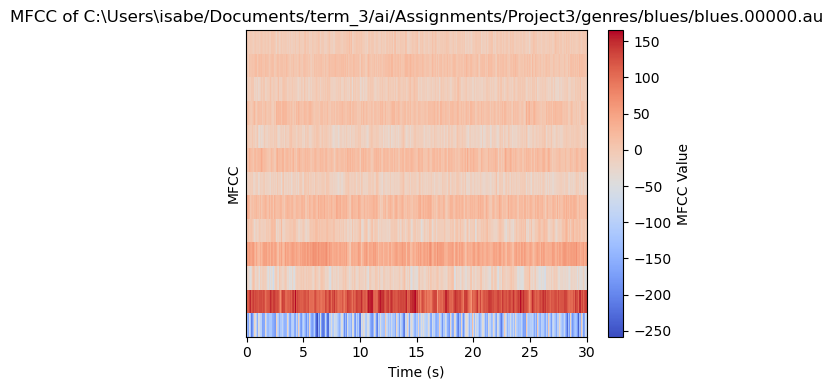

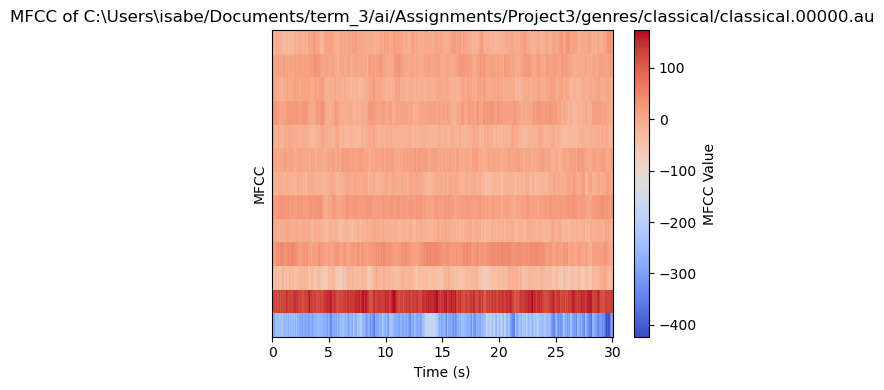

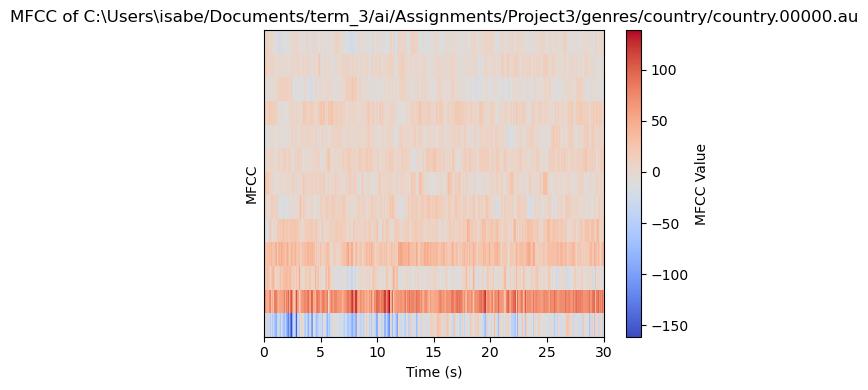

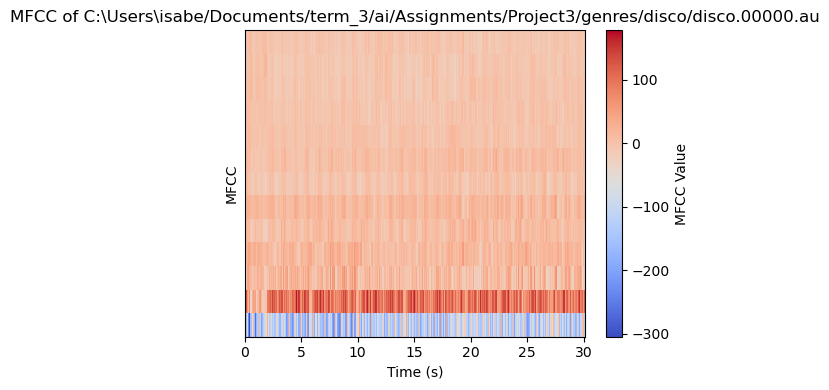

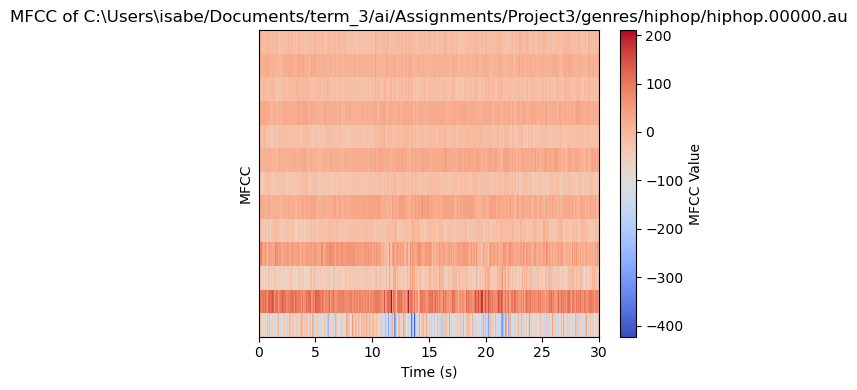

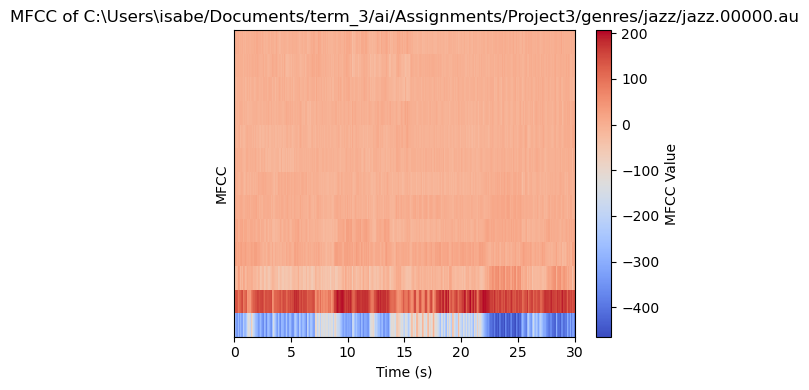

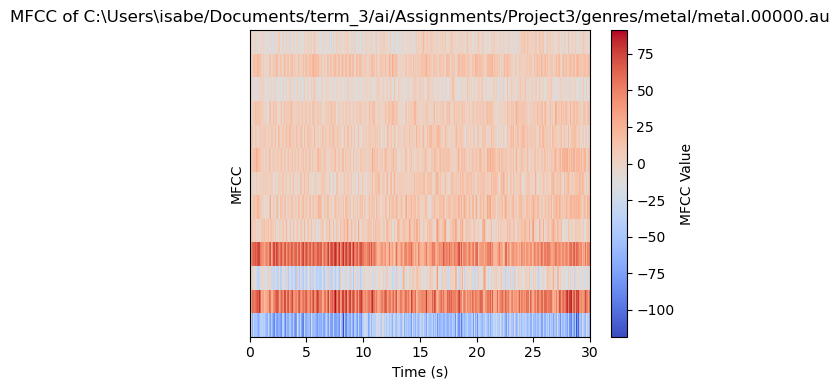

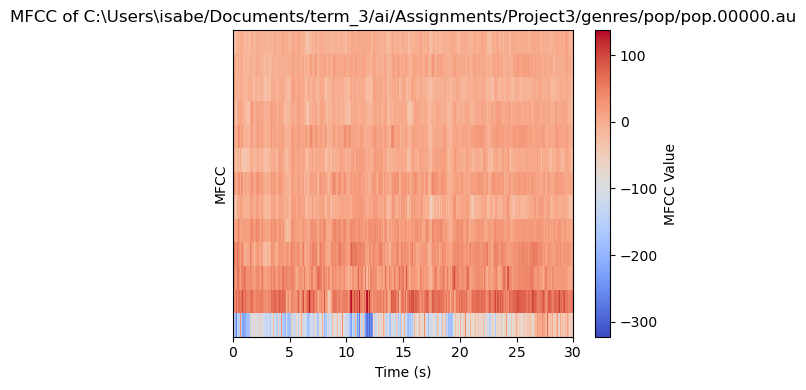

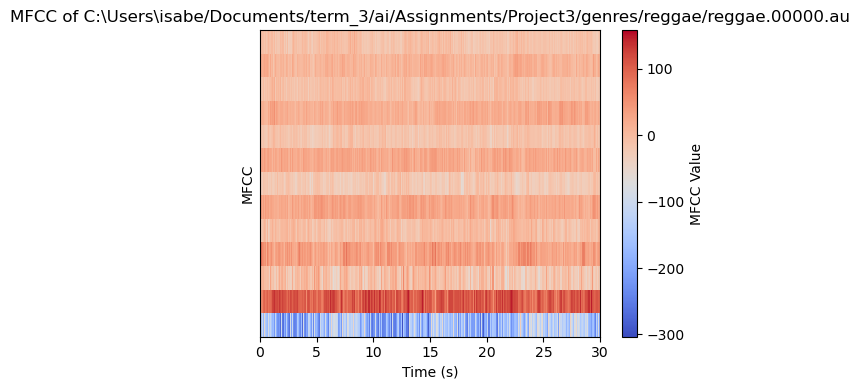

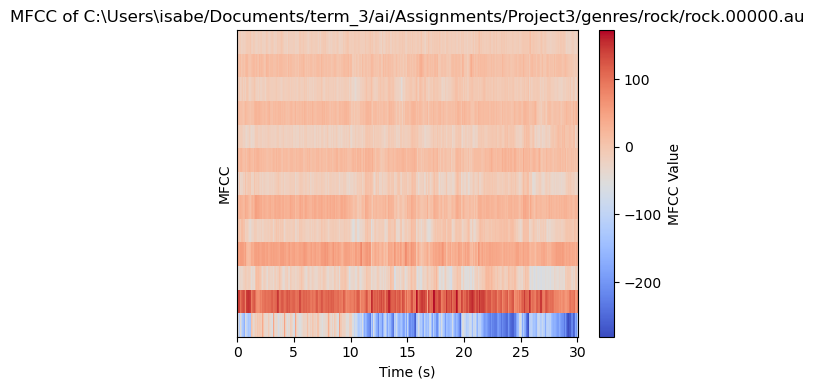

In [3]:
#display graphs of first song from each genre
for genre in GENRES:
    display_mfcc(f'{GEN_DIR}/{genre}/{genre}.00000.au')

### Step 2 - Feature Extraction

In [4]:
#Creating extract_features_song(file_path) function
def extract_features_song(file_path):
    """
    Processes an audio file, extracts mfccs, flattens the array,
    normalizes, and pads/truncates to a specified feature length
    """
    #error handling
    try:
        #load audio file sr=None for original sample rate
        y, _ = librosa.load(file_path, sr=None)

        #extracting 13 mfcc using librosa.feature.mfcc()
        mfcc = librosa.feature.mfcc(y=y, n_mfcc=13)

        #flatten mfcc into single feature vector
        mfcc = mfcc.flatten()

        #normalize vector vector from -1 to 1
        max_abs_value = np.max(np.abs(mfcc))
        if max_abs_value != 0:
            mfcc /= max_abs_value

        #pad or truncate to 25,000 elements
        FEATURE_LENGTH = 25000
        if len(mfcc) < FEATURE_LENGTH:
            mfcc = np.pad(mfcc, (0, FEATURE_LENGTH - len(mfcc)), mode='constant')
        else:
            #if len(mfcc) > feature length, truncate using slicing
            mfcc = mfcc[:FEATURE_LENGTH]

        return mfcc
    except Exception as e:
        print(f'Error Processing Audio: {file_path} \n Error: {e}')
        return None

In [5]:
#testing function on audio files
#features between -1 and 1
#shape is 25000 features in a 1D array
for genre in GENRES:
    mfcc = extract_features_song(f'{GEN_DIR}/{genre}/{genre}.00027.au')
    print('Features:', mfcc)
    print('Shape:', mfcc.shape)

Features: [-0.66657346 -0.5862631  -0.5861451  ...  0.          0.
  0.        ]
Shape: (25000,)
Features: [-0.70822906 -0.68589866 -0.7005645  ...  0.          0.
  0.        ]
Shape: (25000,)
Features: [-0.40507394 -0.3239265  -0.36021054 ...  0.          0.
  0.        ]
Shape: (25000,)
Features: [-0.511248  -0.5481016 -0.6938072 ...  0.         0.         0.       ]
Shape: (25000,)
Features: [-0.22411585 -0.22125567 -0.32587174 ...  0.          0.
  0.        ]
Shape: (25000,)
Features: [-0.73417395 -0.70342726 -0.6997622  ...  0.          0.
  0.        ]
Shape: (25000,)
Features: [-0.75857997 -0.6406497  -0.71590245 ...  0.          0.
  0.        ]
Shape: (25000,)
Features: [-0.8121563  -0.7463806  -0.74362314 ...  0.          0.
  0.        ]
Shape: (25000,)
Features: [-0.57532316 -0.6082184  -0.73301846 ...  0.          0.
  0.        ]
Shape: (25000,)
Features: [-0.7253509  -0.47859457 -0.32148618 ...  0.          0.
  0.        ]
Shape: (25000,)


### Step 3 - Generate Features & Labels

In [6]:
#creating the generate_features_and_labels() function
def generate_features_and_labels():
    """
    Generates feature vectors and ohc labels for all audio files
    in a specified genre folder
    """
    all_features = []
    all_labels = []

    #iterating through each genre folder
    for genre in GENRES:
        #file path for audio files in each genre
        genre_path = os.path.join(GEN_DIR, genre, '*.au')
        #get all .au files in each directory
        sound_files = glob.glob(genre_path)
        print(f'{len(sound_files)} songs being processed in genre: {genre}')

        #iterating through each audio within each folder
        for file_path in sound_files:
            #extracting features from audio with previous function
            features = extract_features_song(file_path)

            #if feature extraction successful, generate features and labels for model
            if features is not None:
                all_features.append(features)
                all_labels.append(genre)

    #one hot encoding genre labels
    label_uniq_ids, label_row_ids = np.unique(all_labels, return_inverse=True)
    ohc_labels = to_categorical(label_row_ids, num_classes=len(GENRES))
    return np.array(all_features), ohc_labels

#ensuring correct output
features, labels = generate_features_and_labels()
features, labels

100 songs being processed in genre: blues
100 songs being processed in genre: classical
100 songs being processed in genre: country
100 songs being processed in genre: disco
100 songs being processed in genre: hiphop
100 songs being processed in genre: jazz
100 songs being processed in genre: metal
100 songs being processed in genre: pop
100 songs being processed in genre: reggae
100 songs being processed in genre: rock


(array([[-0.93301725, -0.8189428 , -0.75184417, ...,  0.        ,
          0.        ,  0.        ],
        [-0.75608546, -0.49915698, -0.3479285 , ...,  0.        ,
          0.        ,  0.        ],
        [-0.26982152, -0.2260249 , -0.2802357 , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.66290224, -0.47099873, -0.4490566 , ...,  0.        ,
          0.        ,  0.        ],
        [-0.39539677, -0.40267324, -0.44910252, ...,  0.        ,
          0.        ,  0.        ],
        [-0.6243655 , -0.6140503 , -0.64209867, ...,  0.        ,
          0.        ,  0.        ]], dtype=float32),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]]))

In [7]:
#ensuring correct features, labels output
#1000 songs, 25000 features
#1000 songs, 10 genres
print('Shape of Features:', features.shape)
print('Shape of Labels:', labels.shape)

Shape of Features: (1000, 25000)
Shape of Labels: (1000, 10)


### Step 4 - Data Splitting

In [8]:
#creating array of indices to number of rows in features (1000 songs)
indices = np.arange(features.shape[0])

#shuffling array to ensure random sampling, preventing ordering bias in training and testing set
np.random.shuffle(indices)

#calculating split index
training_split = 0.8
split_idx = int(training_split * len(features))

#creating testing and training indices
train_indices, test_indices = indices[:split_idx], indices[split_idx:]

#creating training and testing sets from features and labels using indices
train_input, train_labels = features[train_indices], labels[train_indices]
test_input, test_labels = features[test_indices], labels[test_indices]

In [9]:
#verifying shapes
#800:200 or 4:1
print(f'Training set shape: {train_input.shape}, {train_labels.shape}')
print(f'Testing set shape: {test_input.shape}, {test_labels.shape}')

Training set shape: (800, 25000), (800, 10)
Testing set shape: (200, 25000), (200, 10)


### Step 5 - Model Building

In [10]:
#Constructing neural network using Keras
nn = Sequential([
    Dense(100, input_shape=(25000,), activation='relu'), #input layer accepts vector size 25000, hidden layer 100 neurons & relu
    Dense(10, activation='softmax') #10 neurons, softmax
])

#compiling the model
#Loss function: categorical_crossentropy, optimizer: adam., metrics: accuracy
nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#printing model summary
print(nn.summary())

C:\Users\isabe\anaconda3\envs\IntroToAI\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │       2,500,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,501,110 (9.54 MB)

 Trainable params: 2,501,110 (9.54 MB)

 Non-trainable params: 0 (0.00 B)

None


### Step 6 - Training the Model

In [11]:
#Training the model with 10 epochs, batch_size=32, 20% validation split
history = nn.fit(train_input, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.2409 - loss: 2.2984 - val_accuracy: 0.4125 - val_loss: 1.7298
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4771 - loss: 1.5647 - val_accuracy: 0.4437 - val_loss: 1.5768
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5403 - loss: 1.3828 - val_accuracy: 0.4313 - val_loss: 1.6461
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.6572 - loss: 1.1281 - val_accuracy: 0.4250 - val_loss: 1.6167
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6401 - loss: 1.0934 - val_accuracy: 0.3875 - val_loss: 1.6407
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6953 - loss: 0.9674 - val_accuracy: 0.4688 - val_loss: 1.5419
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.8217 - loss: 0.7401 - val_accuracy: 0.4812 - val_loss: 1.5549
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8452 - loss: 0.6872 - val_accuracy: 0.5125 - v

### Step 7 - Model Evaluation

In [12]:
test_loss, test_accuracy = nn.evaluate(test_input, test_labels, batch_size=32)
print(f'Test Loss: {test_loss:.4f}, \n Test Accuracy: {test_accuracy:.4f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5376 - loss: 1.3662
Test Loss: 1.3697, 
 Test Accuracy: 0.5150


Final Test Accuracy: 0.5150

### Step 8 - Report

In [22]:
#Getting the accuracies and losses
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

#Making a dataframe
history_df = pd.DataFrame({
    'Epoch': epochs,
    'Train Loss': train_loss,
    'Val Loss': val_loss,
    'Train Accuracy': train_acc,
    'Val Accuracy': val_acc
})

history_df

,Epoch,Train Loss,Val Loss,Train Accuracy,Val Accuracy
0,1,2.089234,1.729806,0.293750,0.41250
1,2,1.532616,1.576753,0.471875,0.44375
2,3,1.379677,1.646148,0.512500,0.43125
3,4,1.135255,1.616744,0.646875,0.42500
4,5,1.031582,1.640731,0.662500,0.38750
5,6,0.918240,1.541906,0.737500,0.46875
6,7,0.771311,1.554918,0.787500,0.48125
7,8,0.674043,1.499143,0.834375,0.51250
8,9,0.580841,1.514709,0.889063,0.52500
9,10,0.516586,1.503378,0.892187,0.48750


During training and over the epochs, the training accuracy gradually increased while training loss gradually decreased. Meanwhile, the validation accuracy fluctuated but gradually increased while the validation loss gradually decreased <br>
After evaluating on the testing set, the model had a final test accuracy of 0.5150 and a test loss of 1.3697.

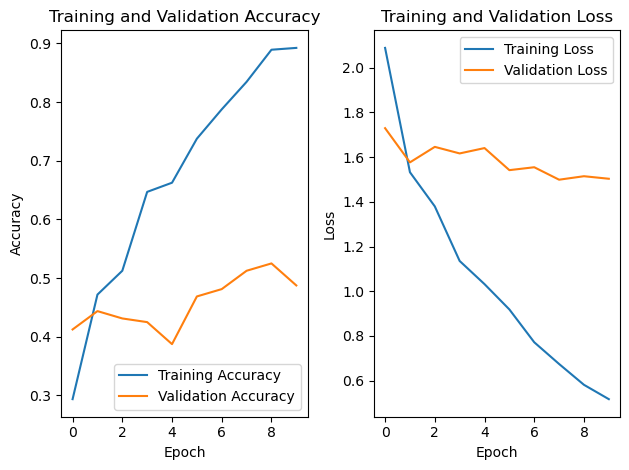

In [13]:
#Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

#Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

Accuracy: The training accuracy gradually increased while validation accuracy slightly increased with some fluctuation. However, it looks like the validation accuracy was beginning to decrease once more. <br>
Loss: The training loss gradually decreased while validation loss slightly decreased with some fluctuation. <br>
Overall, the shape and value of these lines indicate that there may have been slight overfitting.